עוד בדיקות שצריך לעשות

2. לבדוק קורלציות בין כל עמודה לעמודת הנוטשים
3. לסדר את הכל לפי הבדיקה כלומר בדיקה - גרף - הסבר
4. לבדוק על ידי הפרדה של הערכים הקטגוריאלים - למשל כמה נשים נוטשות לעומת גברים
5. כמה אזרחים ותיקים לעומת צעירים נוטשים - נבדק
6. כמה כאלה שיש להם בן זוג לעומת אלא שלא - נבדק
7. ליצור דטא של נוטשים ודטא של קבועים ולעשות עליהם בדיוקת בנפרד ואולי גם T-Test
8. לכמה מהנוטשים היו את כל השירותים ולכמה מהלא נוטשים היו כל השירותים
9. לכמה מכל אחד מהם היה רק שירות אחד
   

# ***EDA For "Telco-Customer-Churn" dataset***

### Why this dataset?

In the future I would like to use the dataset to try and make a prediction model about customers that are about to churn/leave

(dataset and the follow content taken from kaggle)

 - Each row represents a customer
 - Each column contains customer's attibutes discribed below
 - The data set includes information about:

1. Customers who left within the last month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support,       and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents


## ***COLUMNS DESCRIPTION:***



      customerID                          Unique ID assigned to each customer
      gender                              Customer’s gender (e.g., 'Male' or 'Female')
      SeniorCitizen                       Indicates if the customer is a senior citizen (1 = Yes, 0 = No)
      Partner                             Indicates if the customer has a partner(example: Husband/Wife) (Yes/No)
      Dependents                          Indicates if the customer has dependents (example: children) (Yes/No)
      tenure                              Number of months the customer has stayed with the company
      PhoneService                        Indicates if the customer subscribes to phone service (Yes/No)
      MultipleLines                       Indicates if customer has multiple phone lines (Yes/No/No phone service)
      InternetService                     Type of internet service (DSL/Fiber optic/No)
      OnlineSecurity                      Online security service (Yes/No/No internet service)
      OnlineBackup                        Online backup service (Yes/No/No internet service)
      DeviceProtection                    Device protection plan (Yes/No/No internet service)
      TechSupport                         Tech support service (Yes/No/No internet service)
      StreamingTV                         Streaming TV service (Yes/No/No internet service)
      StreamingMovies                     Streaming movies service (Yes/No/No internet service)
      Contract                            Contract term (Month-to-month, One year, Two year)
      PaperlessBilling                    Indicates if customer opts for paperless billing (Yes/No)
      PaymentMethod                       Payment method (e.g., 'Electronic check', 'Mailed check', etc.)
      MonthlyCharges                      Amount charged to the customer monthly (in USD)
      TotalCharges                        Total amount charged to the customer (in USD)
      Churn                               Indicates if the customer has left (Yes/No)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [4]:
data = pd.read_csv('./datasets/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

some string type are present as object, and can be convert to string and maby to booloan or category types

# <b>Convertion</b>

In [64]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [22]:
data = data.convert_dtypes()

In [35]:
 #convert 'TotalCharges' to float
# errors='coerce' convert missing values (like blank strings) into NaN
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   Int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


- columns with 2 to 4 options should be category type (or keep them string?)
- TotalCharges column present as object (and actually was string) converted to float

# Gender And Churn

In [25]:
woman = data[data['gender'] == 'Female']

In [26]:
woman.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3488.0,0.162844,0.369276,0.0,0.0,0.0,0.0,1.0
tenure,3488.0,32.244553,24.463233,0.0,9.0,29.0,55.0,72.0
MonthlyCharges,3488.0,65.204243,30.061341,18.4,35.9,70.65,89.85,118.75
TotalCharges,3483.0,2283.190985,2270.830254,18.85,402.875,1387.35,3819.8,8672.45


In [27]:
man = data[data['gender'] == 'Male']

In [28]:
man.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3555.0,0.161463,0.368009,0.0,0.0,0.0,0.0,1.0
tenure,3555.0,32.495359,24.656359,0.0,9.0,29.0,56.0,72.0
MonthlyCharges,3555.0,64.327482,30.116093,18.25,35.225,70.1,89.875,118.35
TotalCharges,3549.0,2283.407861,2263.100874,18.8,397.0,1404.65,3771.5,8684.8


- woman count is a bit less then man count
- 

# ***Correlations And Crosstabs***

In [57]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']
sub_df = data[numeric_cols].copy()
sub_df['TotalCharges']=pd.to_numeric(sub_df['TotalCharges'], errors='coerce')
sub_df['MonthlyCharges']=pd.to_numeric(sub_df['MonthlyCharges'], errors='coerce')
sub_df.corr()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
tenure,1.000000,0.247900,0.825880,0.016567
MonthlyCharges,0.247900,1.000000,0.651065,0.220173
TotalCharges,0.825880,0.651065,1.000000,0.102411
SeniorCitizen,0.016567,0.220173,0.102411,1.000000


In [58]:
sub_df.dtypes

tenure              Int64
MonthlyCharges    Float64
TotalCharges      Float64
SeniorCitizen       Int64
dtype: object

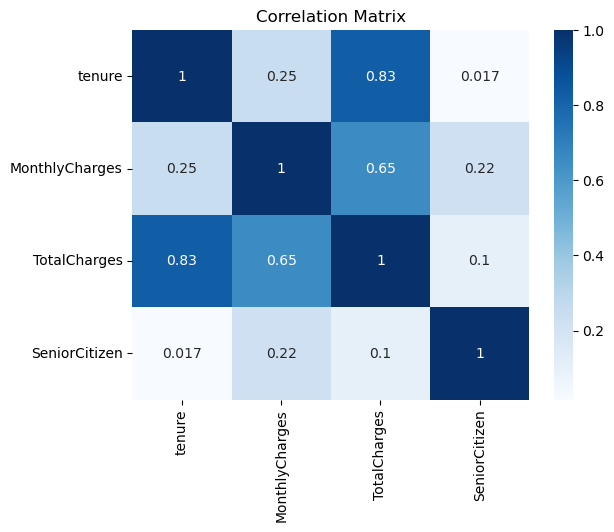

In [60]:
corr_matrix = sub_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

<table>
    <tr>
        <td>Pair</td>
        <td>Correlation</td>
        <td>Interpretation</td>
    </tr>
    <tr>
        <td>tenure & TotalCharges</td>
        <td>0.83</td>
        <td>Strongly positive: longer-tenured customers tend to have higher total charges over time.</td>
    </tr>
    <tr>
        <td>MonthlyCharges & TotalCharges</td>
        <td>0.65</td>
        <td>Moderately to strongly positive: higher monthly fees lead to higher total charges overall.</td>
    </tr>
     <tr>
        <td>tenure & MonthlyCharges</td>
        <td>0.25</td>
        <td>Mild positive: customers staying longer slightly tend to have higher monthly charges, but not by a                                                      large amount.</td>
    </tr>
</table>

<table></table>

In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8


#### Explanation
##### Quartiles:
- **25% (First Quartile)**: (The value below which 25% of the observations may be found)

  - if  **25.1** under “No” and **56.15** under “Yes,” it means:
    - Among customers who did not churn (`Churn == No`), 25% pay **\$25.10** or less per month.
    - Among customers who did churn (`Churn == Yes`), 25% pay **\$56.15** or less per month.

<hr>

-  **50% (Median)**: (The middle value—50% of the observations lie below and 50% lie above)

  - If  **64.425** under “No” and **79.65** under “Yes,” it means:
    - For non-churning customers, the median monthly charge is **\$64.43**.
    - For churning customers, the median monthly charge is **\$79.65**.

<hr>

-  **75% (Third Quartile)**: (The value below which 75% of the observations may be found)

  - If  **88.4** under “No” and **94.2** under “Yes,” it means:
    - Among non-churners, 75% pay **\$88.40** or less per month.
    - Among churners, 75% pay **\$94.20** or less per month.

the quantiles suggest that customers who churn might have higher monthly charges, since all quartile values (25%, 50%, and 75%) are greater for the “Yes” (churn) group compared to the “No” group.


### ***Do customers with shorter tenure have higher churn rates?***

In [76]:
data.groupby('Churn')['tenure'].max()
#churners = data[data['Churn'] == 'Yes']
#non_churners = data[data['Churn'] == 'No']
#print(f"{len(churners)} churners and {len(non_churners)} Non-churners")

Churn
No     72
Yes    72
Name: tenure, dtype: int64

In [69]:
data.groupby('Churn')['tenure'].min()

Churn
No     0
Yes    1
Name: tenure, dtype: int64

In [77]:
data.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

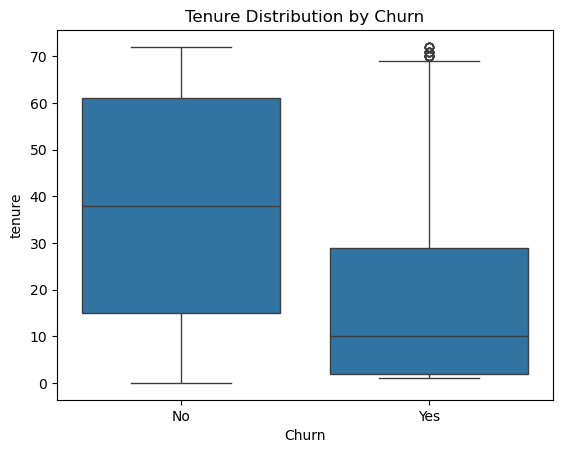

In [34]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure Distribution by Churn')
plt.show()

In [36]:
data.groupby('Churn')[['tenure']].describe().T

Churn                  No          Yes
tenure count  5174.000000  1869.000000
       mean     37.569965    17.979133
       std      24.113777    19.531123
       min       0.000000     1.000000
       25%      15.000000     2.000000
       50%      38.000000    10.000000
       75%      61.000000    29.000000
       max      72.000000    72.000000

<p>The average Number of months that a customer has stayed with the company before churn is 18 months</p>
<br>
<p>Customers who stay (Churn = No) have a much longer average tenure (38 months) </p>                                      
<p>than those who leave (Churn = Yes), who only stay on average 18 months</p>

In [37]:
data.groupby('Churn')['MonthlyCharges'].describe().T

Churn,No,Yes
count,5174.000000,1869.000000
mean,61.265124,74.441332
std,31.092648,24.666053
min,18.250000,18.850000
25%,25.100000,56.150000
50%,64.425000,79.650000
75%,88.400000,94.200000
max,118.750000,118.350000


Count - There are more non-churners than churners in the dataset.

Mean  - Churners pay 13 USD more per month on average than non-churners. *this gap suggests that higher bills may be a factor to churn.

Std	  - Non-churners have a wider range of monthly charges; churners’ charges vary less. indicating more variety in how much Non-churners pay

Min	  - Both groups can have relatively low charges (around 18–19 USD).

25%	  - of non-churners pay less than 25.10, while 25% of churners pay more than 56.15. (Big difference). 

50%   - The median churner pays significantly more monthly than the median non-churner.

75%	  - In the upper quartile, churners still pay a bit more per month.

Max	  - The maximum monthly charge is similar in both groups.
____________________________________________________________________________________________________________________________________________________
Customers who pay more per month are with higher probability to churn, 

higher monthly charges correlate with higher churn rates.

Among customers who did not churn (Churn == No), 25% pay $25.10 or less per month.

Among customers who did churn (Churn == Yes), 25% pay $56.15 or less per month.

### - ***Do customers with longer period contracts churn less? / do customers with short period contract churn more?***
### - ***Churn vs. Contract***

In [46]:
# percentage (normalize='index')
pd.crosstab(data['Contract'], data['Churn'], normalize='index') 

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [45]:
pd.crosstab(data['Contract'], data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


<p>Month-to-Month payers - 57% stays, 43%  churn</p>
<p>One year payers -  89% stays, 11%  churn</p>
<p>Two years payers - 97% stays, 3% churn</p>

- Month-to-month customers have the highest churn rate, maby because thay got less barriers to cancel
  Shorter contract = higher churn 

### Do payment methods affect customer churn?
## ***Churn vs. PaymentMethod***

In [47]:
# percentage (normalize='index')
pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index') 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [48]:
pd.crosstab(data['PaymentMethod'], data['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


 - clearly Electronic check has the highest churn rate (45%)
#### asuumbtions:
 - maby this customer are more alert for each monthly payment
 - and on month-to-monthe it easier to cancel as we already saw
 - customer that are more digital oriented might follow their payments more efficient

 - while the rest of the payment method has 15% to 19% churn rate
#### asuumbtions:
this could be because it is more convenience or this type of payments are get checked less (among other bills in the payment card)
more like "set payment once and forget about it" approch 


### Does Paperless Billing affect customers churn?
## ***Churn vs. PaperlessBilling***

In [50]:
# percentage (normalize='index')
pd.crosstab(data['PaperlessBilling'], data['Churn'], normalize='index')

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


In [51]:
pd.crosstab(data['PaperlessBilling'], data['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


##### The churn rate is double (16% vs 34%) for customers that has paperless billing
- maby the customers that have the paperless billing get the bill by email or other digital way 
  and they might follow their payments more efficient
- it might be demographic difference like younger vs older - older people prefer the paper billing and younger the paperless billing
  Older people are less likely to change their service provider frequently, and have a harder time dealing with bureaucracy and the opossite for          younger people

- On the other hand, people with a paperless account might be less aware of their bills (the opossite of what I claimed so far) 
  than people with a paper account, and when an incorrect charge occurs, it may cause them to become frustrated and churn.


### Which internet service type has the highest churn rate?
## ***Churn vs. InternetService Type***

In [53]:
# percentage (normalize='index')
pd.crosstab(data['InternetService'], data['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [54]:
pd.crosstab(data['InternetService'], data['Churn'])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


- DSL has 19% churn rate
- Fiber optic have 42% churn rate
- No Internet 7.5% churn rate

##### Fiber optic have the highes churn rate, indicate that:
- higher costs for fiber leads to churn
- the expectation from that service package (FIBER are better) leads to disappointment 
- competitive market for faster internet might lead to switching providers with bettr offers

### Do senior citizens have a higher churn rate?
## ***Churn vs. SeniorCitizen***

In [55]:
# percentage (normalize='index')
pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index')

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [57]:
pd.crosstab(data['SeniorCitizen'], data['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


##### that shows that senior citizens has higher churn rate (which is the opposite of the assumption I made so far)

- Seniors might be more sensitive to price increases
- they use less Tech services that they need to pay for
- other providers that has senior citizens discounts or simpler plan package


### Do customers with partners have a higher churn rate?
## ***Churn vs. Partner***

In [58]:
# percentage (normalize='index')
pd.crosstab(data['Partner'], data['Churn'], normalize='index')

Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


In [59]:
pd.crosstab(data['Partner'], data['Churn'])

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


##### Having a partner shows lower churn. This difference is shown (13%)
- Customers with a partner may share bills or have more stable finances, less cancelation propbility
- The more people depend on the service, the more complicated it is to cancel, the more bureaucracy and coordination with the partner


## ***Crosstabs Visualization***

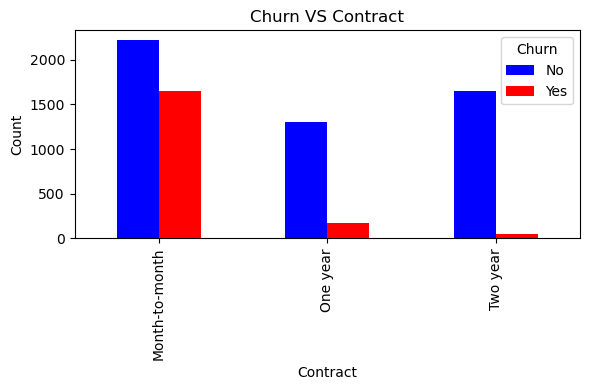

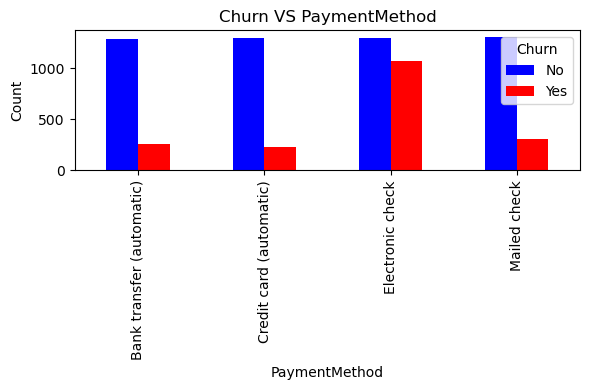

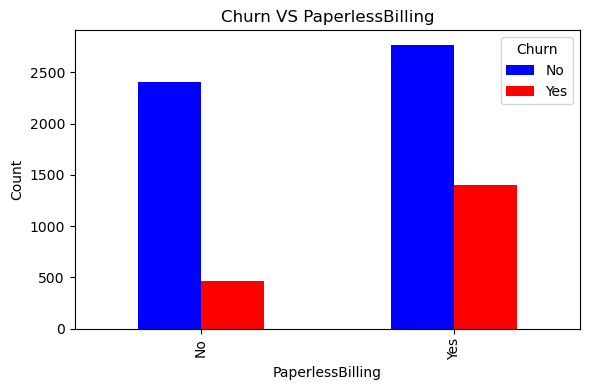

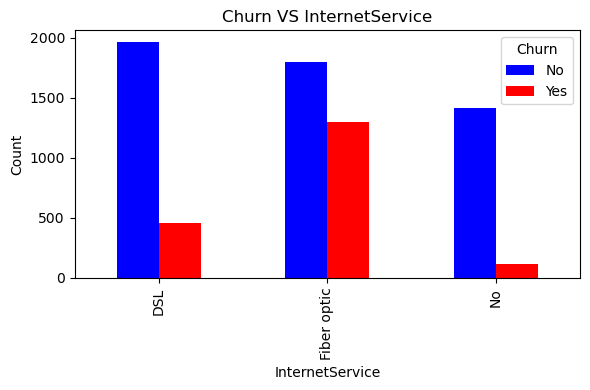

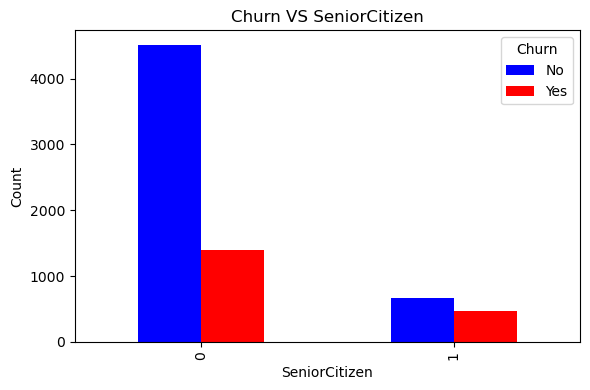

In [16]:
categorical_cols = ['Contract', 'PaymentMethod', 'PaperlessBilling', 
                    'InternetService', 'SeniorCitizen']

for col in categorical_cols:
    cross_tab = pd.crosstab(data[col], data['Churn'])
    
    cross_tab.plot(kind='bar', stacked=False, 
                   color=['blue', 'red'],  # Blue is "No", red is "Yes"
                   figsize=(6, 4))
    
    plt.title(f'Churn VS {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

## ***T-Test***

#### T-Test for churn and monthly charges

T-statistic: 18.4075
P-value: 8.5924e-73
Result: Significant difference in average monthly charges between churners and non-churners.


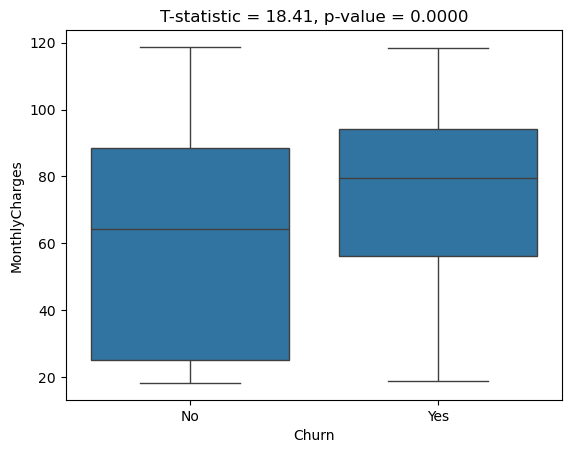

In [9]:
# Separate the MonthlyCharges data by churn status
churn_yes = data.loc[data['Churn'] == 'Yes', 'MonthlyCharges']
churn_no = data.loc[data['Churn'] == 'No', 'MonthlyCharges']

# equal_var=False (Welch's Variant - which does not assume equal population)
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Significant difference in average monthly charges between churners and non-churners.")
else:
    print("Result: No significant difference in average monthly charges between churners and non-churners.")

sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title(f"T-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
plt.show()

#### T-test for churn and tenure

T-statistic: -34.8238
P-value: 1.1955e-232
Result: Significant difference in average monthly charges between churners and non-churners.


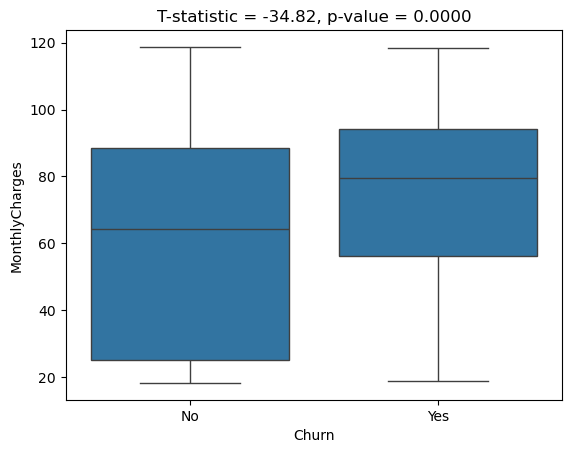

In [15]:
# Separate the tenure data by churn status
churn_yes = data.loc[data['Churn'] == 'Yes', 'tenure']
churn_no = data.loc[data['Churn'] == 'No', 'tenure']

# equal_var=False meaning its a Welch's Variant (which does not assume equal population)
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Significant difference in tenure between churners and non-churners.")
else:
    print("Result: No significant difference in tenure between churners and non-churners.")

sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title(f"T-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
plt.show()

### Some distribution plots

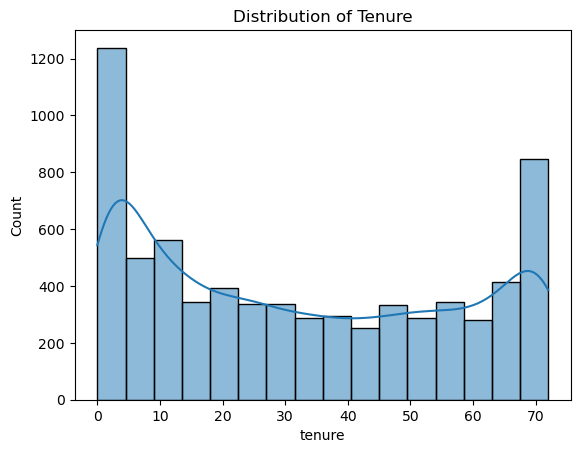

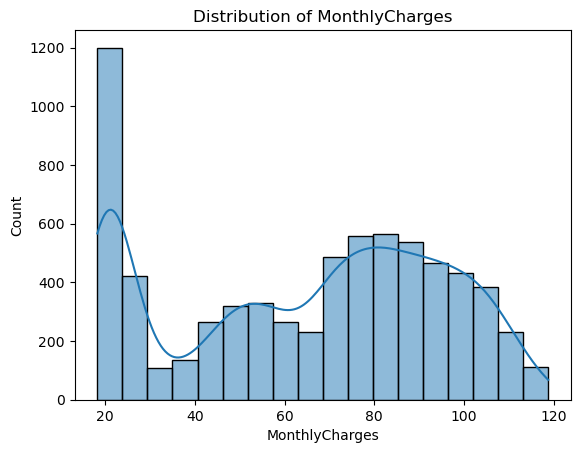

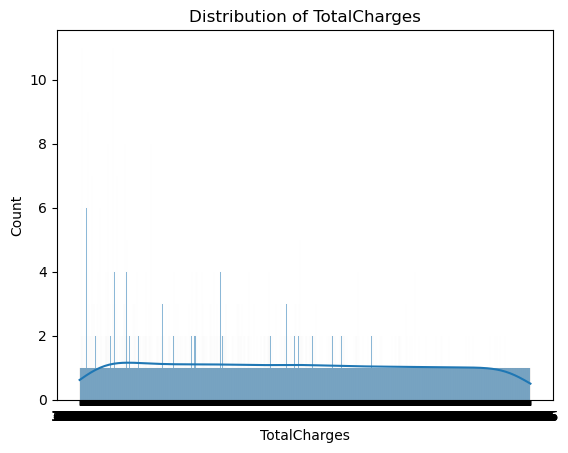

In [12]:
# For Tenure (Number of months the customer has stayed with the company)
sns.histplot(data=data, x='tenure', kde=True)
plt.title('Distribution of Tenure')
plt.show()

# For MonthlyCharges
sns.histplot(data=data, x='MonthlyCharges', kde=True)
plt.title('Distribution of MonthlyCharges')
plt.show()

# For TotalCharges (after converting to numeric, if needed)
sns.histplot(data=data, x='TotalCharges', kde=True)
plt.title('Distribution of TotalCharges')
plt.show()

## other approch to groupby churn and numerical columns with Kurtosis

In [28]:
from scipy.stats import kurtosis

result = data.groupby('Churn', observed=True).agg(
    Mean_MonthlyCharges=('MonthlyCharges', 'mean'),
    Median_MonthlyCharges=('MonthlyCharges', 'median'),
    Kurtosis_MonthlyCharges=('MonthlyCharges', lambda x: kurtosis(x, fisher=True, bias=False)),
    
    Mean_TotalCharges=('TotalCharges', 'mean'),
    Median_TotalCharges=('TotalCharges', 'median'),
    Kurtosis_TotalCharges=('TotalCharges', lambda x: kurtosis(x, fisher=True, bias=False))
)

result

,Mean_MonthlyCharges,Median_MonthlyCharges,Kurtosis_MonthlyCharges,Mean_TotalCharges,Median_TotalCharges,Kurtosis_TotalCharges
Churn,,,,,,
No,61.265124,64.425,-1.355301,2555.344141,1683.60,NaN
Yes,74.441332,79.650,-0.361516,1531.796094,703.55,1.461704


In [64]:
# Coerce TotalCharges to numeric, turning bad/non-numeric entries into NaN
temp_numeric = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Identify which rows became NaN
missing_mask = temp_numeric.isna()

# Slice the original data to see those rows
missing_rows = data[missing_mask]
len(missing_rows)

11

In [ ]:
# 11 rows for TotalCharges columns are with <NA> 